In [1]:
import subprocess
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc
from numpy import linalg as LA
import umap

/storage/group/ibb3/default/.conda/envs/masters/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
files = glob.glob("/storage/home/nsl5160/scratch/brook_trout/trimmed/*_val_1.fq.gz")

In [30]:
for sample in files:
    task = "bwa_sambamba_sort_markdup"
    mem = "120"
    cpus = "20"
    inpath = "/storage/home/nsl5160/scratch/brook_trout/trimmed"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/mapped"
    prefix = sample.rsplit("/", 1)[1].rsplit("_", 2)[0]
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         inpath + " " + outpath + " " + prefix], shell=True)

Submitted batch job 16524533
Submitted batch job 16524534
Submitted batch job 16524535
Submitted batch job 16524536
Submitted batch job 16524537
Submitted batch job 16524538
Submitted batch job 16524539
Submitted batch job 16524540
Submitted batch job 16524541
Submitted batch job 16524542
Submitted batch job 16524543
Submitted batch job 16524544
Submitted batch job 16524545
Submitted batch job 16524546
Submitted batch job 16524547
Submitted batch job 16524548
Submitted batch job 16524549
Submitted batch job 16524550
Submitted batch job 16524551
Submitted batch job 16524552
Submitted batch job 16524553
Submitted batch job 16524554
Submitted batch job 16524555
Submitted batch job 16524556
Submitted batch job 16524557
Submitted batch job 16524558
Submitted batch job 16524559
Submitted batch job 16524560
Submitted batch job 16524561
Submitted batch job 16524562
Submitted batch job 16524563
Submitted batch job 16524564
Submitted batch job 16524565
Submitted batch job 16524566
Submitted batc

In [22]:
%%bash
cat ../makemask.sh
sbatch ../makemask.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=20
#SBATCH --mem=64GB
#SBATCH --time=48:00:00
#SBATCH --job-name=makemask

source ~/.bashrc
conda activate assembly
cd /storage/group/ibb3/default/acro_popgen_variants/trout_mitoassembly/jupyter_notebooks/
cat ../references/sfon_with_mito.fa | seqkit locate --threads 20 -r -p [atgc] --bed \
    | bedtools merge > ../references/sfon_with_mito.rm.bed
Submitted batch job 16542266


In [3]:
!ls /scratch/nsl5160/brook_trout/mapped/*.markdup.bam > ../bam.list

In [5]:
!ls /scratch/nsl5160/brook_trout/sra_mapped/*.markdup.bam >> ../bam.list

In [8]:
bed = pd.read_csv("../references/sfon_with_mito.bed", sep = "\t", header = None)

In [26]:
%%bash
source ~/.bashrc
conda activate ipyrad
bioawk -c fastx '{print $name"\t0\t"length($seq)}' ../references/sfon_with_mito.fa \
    > ../references/sfon_with_mito.bed

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [33]:
%%bash
source ~/.bashrc
conda activate angsd
cat ../references/sfon_with_mito.bed | awk '{print $1"\t"$2+1"\t"$3}' \
    | sort -k1 > ../references/regions_list.txt
angsd sites index ../references/regions_list.txt

	-> Indexing ../references/regions_list.txt and will add '0' to pos column
	-> Filterfile: ../references/regions_list.txt supplied will generate binary representations... 
	-> Input file has 3 columns(bed), chr posStart posStop
	-> Writing chr:'AF154850.1' 
	-> Writing chr:'NC_074665.1' 
	-> Writing chr:'NC_074666.1' 
	-> Writing chr:'NC_074667.1' 
	-> Writing chr:'NC_074668.1' 
	-> Writing chr:'NC_074669.1' 
	-> Writing chr:'NC_074670.1' 
	-> Writing chr:'NC_074671.1' 
	-> Writing chr:'NC_074672.1' 
	-> Writing chr:'NC_074673.1' 
	-> Writing chr:'NC_074674.1' 
	-> Writing chr:'NC_074675.1' 
	-> Writing chr:'NC_074676.1' 
	-> Writing chr:'NC_074677.1' 
	-> Writing chr:'NC_074678.1' 
	-> Writing chr:'NC_074679.1' 
	-> Writing chr:'NC_074680.1' 
	-> Writing chr:'NC_074681.1' 
	-> Writing chr:'NC_074682.1' 
	-> Writing chr:'NC_074683.1' 
	-> Writing chr:'NC_074684.1' 
	-> Writing chr:'NC_074685.1' 
	-> Writing chr:'NC_074686.1' 
	-> Writing chr:'NC_074687.1' 
	-> Writing chr:'NC_074688.1'

	-> Writing chr:'NW_026600406.1' 
	-> Writing chr:'NW_026600407.1' 
	-> Writing chr:'NW_026600408.1' 
	-> Writing chr:'NW_026600409.1' 
	-> Writing chr:'NW_026600410.1' 
	-> Writing chr:'NW_026600411.1' 
	-> Writing chr:'NW_026600412.1' 
	-> Writing chr:'NW_026600413.1' 
	-> Writing chr:'NW_026600414.1' 
	-> Writing chr:'NW_026600415.1' 
	-> Writing chr:'NW_026600416.1' 
	-> Writing chr:'NW_026600417.1' 
	-> Writing chr:'NW_026600418.1' 
	-> Writing chr:'NW_026600419.1' 
	-> Writing chr:'NW_026600420.1' 
	-> Writing chr:'NW_026600421.1' 
	-> Writing chr:'NW_026600422.1' 
	-> Writing chr:'NW_026600423.1' 
	-> Writing chr:'NW_026600424.1' 
	-> Writing chr:'NW_026600425.1' 
	-> Writing chr:'NW_026600426.1' 
	-> Writing chr:'NW_026600427.1' 
	-> Writing chr:'NW_026600428.1' 
	-> Writing chr:'NW_026600429.1' 
	-> Writing chr:'NW_026600430.1' 
	-> Writing chr:'NW_026600431.1' 
	-> Writing chr:'NW_026600432.1' 
	-> Writing chr:'NW_026600433.1' 
	-> Writing chr:'NW_026600434.1' 
	-> Writing ch

	-> Writing chr:'NW_026600647.1' 
	-> Writing chr:'NW_026600648.1' 
	-> Writing chr:'NW_026600649.1' 
	-> Writing chr:'NW_026600650.1' 
	-> Writing chr:'NW_026600651.1' 
	-> Writing chr:'NW_026600652.1' 
	-> Writing chr:'NW_026600653.1' 
	-> Writing chr:'NW_026600654.1' 
	-> Writing chr:'NW_026600655.1' 
	-> Writing chr:'NW_026600656.1' 
	-> Writing chr:'NW_026600657.1' 
	-> Writing chr:'NW_026600658.1' 
	-> Writing chr:'NW_026600659.1' 
	-> Writing chr:'NW_026600660.1' 
	-> Writing chr:'NW_026600661.1' 
	-> Writing chr:'NW_026600662.1' 
	-> Writing chr:'NW_026600663.1' 
	-> Writing chr:'NW_026600664.1' 
	-> Writing chr:'NW_026600665.1' 
	-> Writing chr:'NW_026600666.1' 
	-> Writing chr:'NW_026600667.1' 
	-> Writing chr:'NW_026600668.1' 
	-> Writing chr:'NW_026600669.1' 
	-> Writing chr:'NW_026600670.1' 
	-> Writing chr:'NW_026600671.1' 
	-> Writing chr:'NW_026600672.1' 
	-> Writing chr:'NW_026600673.1' 
	-> Writing chr:'NW_026600674.1' 
	-> Writing chr:'NW_026600675.1' 
	-> Writing ch

	-> Writing chr:'NW_026600888.1' 
	-> Writing chr:'NW_026600889.1' 
	-> Writing chr:'NW_026600890.1' 
	-> Writing chr:'NW_026600891.1' 
	-> Writing chr:'NW_026600892.1' 
	-> Writing chr:'NW_026600893.1' 
	-> Writing chr:'NW_026600894.1' 
	-> Writing chr:'NW_026600895.1' 
	-> Writing chr:'NW_026600896.1' 
	-> Writing chr:'NW_026600897.1' 
	-> Writing chr:'NW_026600898.1' 
	-> Writing chr:'NW_026600899.1' 
	-> Writing chr:'NW_026600900.1' 
	-> Writing chr:'NW_026600901.1' 
	-> Writing chr:'NW_026600902.1' 
	-> Writing chr:'NW_026600903.1' 
	-> Writing chr:'NW_026600904.1' 
	-> Writing chr:'NW_026600905.1' 
	-> Writing chr:'NW_026600906.1' 
	-> Writing chr:'NW_026600907.1' 
	-> Writing chr:'NW_026600908.1' 
	-> Writing chr:'NW_026600909.1' 
	-> Writing chr:'NW_026600910.1' 
	-> Writing chr:'NW_026600911.1' 
	-> Writing chr:'NW_026600912.1' 
	-> Writing chr:'NW_026600913.1' 
	-> Writing chr:'NW_026600914.1' 
	-> Writing chr:'NW_026600915.1' 
	-> Writing chr:'NW_026600916.1' 
	-> Writing ch

	-> Writing chr:'NW_026601129.1' 
	-> Writing chr:'NW_026601130.1' 
	-> Writing chr:'NW_026601131.1' 
	-> Writing chr:'NW_026601132.1' 
	-> Writing chr:'NW_026601133.1' 
	-> Writing chr:'NW_026601134.1' 
	-> Writing chr:'NW_026601135.1' 
	-> Writing chr:'NW_026601136.1' 
	-> Writing chr:'NW_026601137.1' 
	-> Writing chr:'NW_026601138.1' 
	-> Writing chr:'NW_026601139.1' 
	-> Writing chr:'NW_026601140.1' 
	-> Writing chr:'NW_026601141.1' 
	-> Writing chr:'NW_026601142.1' 
	-> Writing chr:'NW_026601143.1' 
	-> Writing chr:'NW_026601144.1' 
	-> Writing chr:'NW_026601145.1' 
	-> Writing chr:'NW_026601146.1' 
	-> Writing chr:'NW_026601147.1' 
	-> Writing chr:'NW_026601148.1' 
	-> Writing chr:'NW_026601149.1' 
	-> Writing chr:'NW_026601150.1' 
	-> Writing chr:'NW_026601151.1' 
	-> Writing chr:'NW_026601152.1' 
	-> Writing chr:'NW_026601153.1' 
	-> Writing chr:'NW_026601154.1' 
	-> Writing chr:'NW_026601155.1' 
	-> Writing chr:'NW_026601156.1' 
	-> Writing chr:'NW_026601157.1' 
	-> Writing ch

	-> Writing chr:'NW_026601370.1' 
	-> Writing chr:'NW_026601371.1' 
	-> Writing chr:'NW_026601372.1' 
	-> Writing chr:'NW_026601373.1' 
	-> Writing chr:'NW_026601374.1' 
	-> Writing chr:'NW_026601375.1' 
	-> Writing chr:'NW_026601376.1' 
	-> Writing chr:'NW_026601377.1' 
	-> Writing chr:'NW_026601378.1' 
	-> Writing chr:'NW_026601379.1' 
	-> Writing chr:'NW_026601380.1' 
	-> Writing chr:'NW_026601381.1' 
	-> Writing chr:'NW_026601382.1' 
	-> Writing chr:'NW_026601383.1' 
	-> Writing chr:'NW_026601384.1' 
	-> Writing chr:'NW_026601385.1' 
	-> Writing chr:'NW_026601386.1' 
	-> Writing chr:'NW_026601387.1' 
	-> Writing chr:'NW_026601388.1' 
	-> Writing chr:'NW_026601389.1' 
	-> Writing chr:'NW_026601390.1' 
	-> Writing chr:'NW_026601391.1' 
	-> Writing chr:'NW_026601392.1' 
	-> Writing chr:'NW_026601393.1' 
	-> Writing chr:'NW_026601394.1' 
	-> Writing chr:'NW_026601395.1' 
	-> Writing chr:'NW_026601396.1' 
	-> Writing chr:'NW_026601397.1' 
	-> Writing chr:'NW_026601398.1' 
	-> Writing ch

	-> Writing chr:'NW_026601611.1' 
	-> Writing chr:'NW_026601612.1' 
	-> Writing chr:'NW_026601613.1' 
	-> Writing chr:'NW_026601614.1' 
	-> Writing chr:'NW_026601615.1' 
	-> Writing chr:'NW_026601616.1' 
	-> Writing chr:'NW_026601617.1' 
	-> Writing chr:'NW_026601618.1' 
	-> Writing chr:'NW_026601619.1' 
	-> Writing chr:'NW_026601620.1' 
	-> Writing chr:'NW_026601621.1' 
	-> Writing chr:'NW_026601622.1' 
	-> Writing chr:'NW_026601623.1' 
	-> Writing chr:'NW_026601624.1' 
	-> Writing chr:'NW_026601625.1' 
	-> Writing chr:'NW_026601626.1' 
	-> Writing chr:'NW_026601627.1' 
	-> Writing chr:'NW_026601628.1' 
	-> Writing chr:'NW_026601629.1' 
	-> Writing chr:'NW_026601630.1' 
	-> Writing chr:'NW_026601631.1' 
	-> Writing chr:'NW_026601632.1' 
	-> Writing chr:'NW_026601633.1' 
	-> Writing chr:'NW_026601634.1' 
	-> Writing chr:'NW_026601635.1' 
	-> Writing chr:'NW_026601636.1' 
	-> Writing chr:'NW_026601637.1' 
	-> Writing chr:'NW_026601638.1' 
	-> Writing chr:'NW_026601639.1' 
	-> Writing ch

	-> Writing chr:'NW_026601852.1' 
	-> Writing chr:'NW_026601853.1' 
	-> Writing chr:'NW_026601854.1' 
	-> Writing chr:'NW_026601855.1' 
	-> Writing chr:'NW_026601856.1' 
	-> Writing chr:'NW_026601857.1' 
	-> Writing chr:'NW_026601858.1' 
	-> Writing chr:'NW_026601859.1' 
	-> Writing chr:'NW_026601860.1' 
	-> Writing chr:'NW_026601861.1' 
	-> Writing chr:'NW_026601862.1' 
	-> Writing chr:'NW_026601863.1' 
	-> Writing chr:'NW_026601864.1' 
	-> Writing chr:'NW_026601865.1' 
	-> Writing chr:'NW_026601866.1' 
	-> Writing chr:'NW_026601867.1' 
	-> Writing chr:'NW_026601868.1' 
	-> Writing chr:'NW_026601869.1' 
	-> Writing chr:'NW_026601870.1' 
	-> Writing chr:'NW_026601871.1' 
	-> Writing chr:'NW_026601872.1' 
	-> Writing chr:'NW_026601873.1' 
	-> Writing chr:'NW_026601874.1' 
	-> Writing chr:'NW_026601875.1' 
	-> Writing chr:'NW_026601876.1' 
	-> Writing chr:'NW_026601877.1' 
	-> Writing chr:'NW_026601878.1' 
	-> Writing chr:'NW_026601879.1' 
	-> Writing chr:'NW_026601880.1' 
	-> Writing ch

	-> Writing chr:'NW_026602093.1' 
	-> Writing chr:'NW_026602094.1' 
	-> Writing chr:'NW_026602095.1' 
	-> Writing chr:'NW_026602096.1' 
	-> Writing chr:'NW_026602097.1' 
	-> Writing chr:'NW_026602098.1' 
	-> Writing chr:'NW_026602099.1' 
	-> Writing chr:'NW_026602100.1' 
	-> Writing chr:'NW_026602101.1' 
	-> Writing chr:'NW_026602102.1' 
	-> Writing chr:'NW_026602103.1' 
	-> Writing chr:'NW_026602104.1' 
	-> Writing chr:'NW_026602105.1' 
	-> Writing chr:'NW_026602106.1' 
	-> Writing chr:'NW_026602107.1' 
	-> Writing chr:'NW_026602108.1' 
	-> Writing chr:'NW_026602109.1' 
	-> Writing chr:'NW_026602110.1' 
	-> Writing chr:'NW_026602111.1' 
	-> Writing chr:'NW_026602112.1' 
	-> Writing chr:'NW_026602113.1' 
	-> Writing chr:'NW_026602114.1' 
	-> Writing chr:'NW_026602115.1' 
	-> Writing chr:'NW_026602116.1' 
	-> Writing chr:'NW_026602117.1' 
	-> Writing chr:'NW_026602118.1' 
	-> Writing chr:'NW_026602119.1' 
	-> Writing chr:'NW_026602120.1' 
	-> Writing chr:'NW_026602121.1' 
	-> Writing ch

	-> Writing chr:'NW_026602334.1' 
	-> Writing chr:'NW_026602335.1' 
	-> Writing chr:'NW_026602336.1' 
	-> Writing chr:'NW_026602337.1' 
	-> Writing chr:'NW_026602338.1' 
	-> Writing chr:'NW_026602339.1' 
	-> Writing chr:'NW_026602340.1' 
	-> Writing chr:'NW_026602341.1' 
	-> Writing chr:'NW_026602342.1' 
	-> Writing chr:'NW_026602343.1' 
	-> Writing chr:'NW_026602344.1' 
	-> Writing chr:'NW_026602345.1' 
	-> Writing chr:'NW_026602346.1' 
	-> Writing chr:'NW_026602347.1' 
	-> Writing chr:'NW_026602348.1' 
	-> Writing chr:'NW_026602349.1' 
	-> Writing chr:'NW_026602350.1' 
	-> Writing chr:'NW_026602351.1' 
	-> Writing chr:'NW_026602352.1' 
	-> Writing chr:'NW_026602353.1' 
	-> Writing chr:'NW_026602354.1' 
	-> Writing chr:'NW_026602355.1' 
	-> Writing chr:'NW_026602356.1' 
	-> Writing chr:'NW_026602357.1' 
	-> Writing chr:'NW_026602358.1' 
	-> Writing chr:'NW_026602359.1' 
	-> Writing chr:'NW_026602360.1' 
	-> Writing chr:'NW_026602361.1' 
	-> Writing chr:'NW_026602362.1' 
	-> Writing ch

	-> Writing chr:'NW_026602575.1' 
	-> Writing chr:'NW_026602576.1' 
	-> Writing chr:'NW_026602577.1' 
	-> Writing chr:'NW_026602578.1' 
	-> Writing chr:'NW_026602579.1' 
	-> Writing chr:'NW_026602580.1' 
	-> Writing chr:'NW_026602581.1' 
	-> Writing chr:'NW_026602582.1' 
	-> Writing chr:'NW_026602583.1' 
	-> Writing chr:'NW_026602584.1' 
	-> Writing chr:'NW_026602585.1' 
	-> Writing chr:'NW_026602586.1' 
	-> Writing chr:'NW_026602587.1' 
	-> Writing chr:'NW_026602588.1' 
	-> Writing chr:'NW_026602589.1' 
	-> Writing chr:'NW_026602590.1' 
	-> Writing chr:'NW_026602591.1' 
	-> Writing chr:'NW_026602592.1' 
	-> Writing chr:'NW_026602593.1' 
	-> Writing chr:'NW_026602594.1' 
	-> Writing chr:'NW_026602595.1' 
	-> Writing chr:'NW_026602596.1' 
	-> Writing chr:'NW_026602597.1' 
	-> Writing chr:'NW_026602598.1' 
	-> Writing chr:'NW_026602599.1' 
	-> Writing chr:'NW_026602600.1' 
	-> Writing chr:'NW_026602601.1' 
	-> Writing chr:'NW_026602602.1' 
	-> Writing chr:'NW_026602603.1' 
	-> Writing ch

	-> Writing chr:'NW_026602816.1' 
	-> Writing chr:'NW_026602817.1' 
	-> Writing chr:'NW_026602818.1' 
	-> Writing chr:'NW_026602819.1' 
	-> Writing chr:'NW_026602820.1' 
	-> Writing chr:'NW_026602821.1' 
	-> Writing chr:'NW_026602822.1' 
	-> Writing chr:'NW_026602823.1' 
	-> Writing chr:'NW_026602824.1' 
	-> Writing chr:'NW_026602825.1' 
	-> Writing chr:'NW_026602826.1' 
	-> Writing chr:'NW_026602827.1' 
	-> Writing chr:'NW_026602828.1' 
	-> Writing chr:'NW_026602829.1' 
	-> Writing chr:'NW_026602830.1' 
	-> Writing chr:'NW_026602831.1' 
	-> Writing chr:'NW_026602832.1' 
	-> Writing chr:'NW_026602833.1' 
	-> Writing chr:'NW_026602834.1' 
	-> Writing chr:'NW_026602835.1' 
	-> Writing chr:'NW_026602836.1' 
	-> Writing chr:'NW_026602837.1' 
	-> Writing chr:'NW_026602838.1' 
	-> Writing chr:'NW_026602839.1' 
	-> Writing chr:'NW_026602840.1' 
	-> Writing chr:'NW_026602841.1' 
	-> Writing chr:'NW_026602842.1' 
	-> Writing chr:'NW_026602843.1' 
	-> Writing chr:'NW_026602844.1' 
	-> Writing ch

In [6]:
!wc -l ../bam.list

253 ../bam.list


In [15]:
for i in bed[0].head(42).tolist():
    task = "angsd"
    mem = "100"
    cpus = "8"
    bamlist = "../bam.list"
    outpath = "../gls"
    outprefix = i
    minmaf = "0.01"
    regions = i + ":"
    sitesfile = "../references/no_repeats_regions_list_chrs.txt"
    ninds = "127"
    ref = "../references/sfon_with_mito.fa"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         bamlist + " " + outpath + " " + outprefix + " " + 
         minmaf + " " + regions + " " + sitesfile + " " + 
         ninds + " " + ref ], shell=True)

Submitted batch job 33616263
Submitted batch job 33616264
Submitted batch job 33616265
Submitted batch job 33616266
Submitted batch job 33616267
Submitted batch job 33616268
Submitted batch job 33616269
Submitted batch job 33616270
Submitted batch job 33616271
Submitted batch job 33616272
Submitted batch job 33616273
Submitted batch job 33616274
Submitted batch job 33616275
Submitted batch job 33616276
Submitted batch job 33616277
Submitted batch job 33616278
Submitted batch job 33616279
Submitted batch job 33616280
Submitted batch job 33616281
Submitted batch job 33616282
Submitted batch job 33616283
Submitted batch job 33616284
Submitted batch job 33616285
Submitted batch job 33616286
Submitted batch job 33616287
Submitted batch job 33616288
Submitted batch job 33616289
Submitted batch job 33616290
Submitted batch job 33616291
Submitted batch job 33616292
Submitted batch job 33616293
Submitted batch job 33616294
Submitted batch job 33616295
Submitted batch job 33616296
Submitted batc

In [334]:
for i in bed[0].head(42).tolist():
    subprocess.run(["zcat ../calls/" + i + ".beagle.gz | tail -n+2 | head -n -1 | gzip >> ../calls/sfon.beagle.gz"], shell = True)

We need to remove related individuals as these will influence population structure groupings. We'll do this using a thinned dataset to reduce computation time. We'll subsample every twentieth line of the genotype likelihoods:

In [43]:
%%bash
source ~/.bashrc
conda activate pcangsd
cd ../gls
pcangsd -b NC_074665.1.beagle.gz --thread 8 --out test --minMaf 0.05

PCAngsd v.1.10.
Jonas Meisner and Anders Albrechtsen.
Using 8 thread(s).

Parsing Beagle file.
Loaded 363026 sites and 253 individuals.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 17
Number of sites after MAF filtering (0.05): 189587

Estimating covariance matrix.
Using 2 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2). RMSE=0.008403024366937226
Individual allele frequencies estimated (3). RMSE=0.006322912500782192
Individual allele frequencies estimated (4). RMSE=0.004868943664700158
Individual allele frequencies estimated (5). RMSE=0.0038437485737587156
Individual allele frequencies estimated (6). RMSE=0.003118299190974003
Individual allele frequencies estimated (7). RMSE=0.002590375981999547
Individual allele frequencies estimated (8). RMSE=0.0021930537693539446
Individual allele frequencies estimated (9). RMSE=0.0018842191797510278
Individual allele frequencies estimated (10). RMSE=0

In [3]:
meta = pd.read_csv("../ST_metadata.csv")
sra_meta = pd.read_csv("../SraRunTable.csv")
sra_meta["Sample_ID"] = sra_meta["Run"]
sra_meta = sra_meta[["geo_loc_name", "Sample_ID"]]
sra_meta["Source"] = sra_meta["geo_loc_name"].str.replace("Canada:", "").str.replace("\\", "")
meta = pd.concat([meta, sra_meta[["Sample_ID", "Source"]]]).reset_index(drop=True)

/tmp/ipykernel_2469137/671010854.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sra_meta["Source"] = sra_meta["geo_loc_name"].str.replace("Canada:", "").str.replace("\\", "")


In [4]:
tmp = pd.read_csv("../bam.list", header = None)

In [5]:
tmp[0] = tmp[0].str.split("/", expand = True)[5].str.replace(".markdup.bam", "")

/tmp/ipykernel_2469137/2348267806.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tmp[0] = tmp[0].str.split("/", expand = True)[5].str.replace(".markdup.bam", "")


In [6]:
tmp.columns = ["Sample_ID"]
tmp = tmp.merge(meta, how = "left", on = "Sample_ID")

In [7]:
covmatrix = np.genfromtxt("../gls/test.cov")
w, v = LA.eig(covmatrix)
perc_var = w / w.sum()
perc_var = pd.DataFrame(perc_var).sort_values(0, ascending = False).head(10).reset_index(drop=False)
v = pd.DataFrame(v)
x = v[list(perc_var["index"])]

In [8]:
v = pd.concat([v, tmp], axis = 1)

In [12]:
v["ass"] = "Other"
v.loc[v["Source"] == "Windfall", "ass"] = "Windfall"
v.loc[v["Source"] == "Temiscamie", "ass"] = "Temiscamie"
v.loc[v["Source"] == "Assinica", "ass"] = "Assinica"
v.loc[v["Source"].str.contains("Mista"), "ass"] = "Mistassini"
v.loc[v["Source"].str.contains("Domestic"), "ass"] = "Domestic"

<Axes: xlabel='0', ylabel='1'>

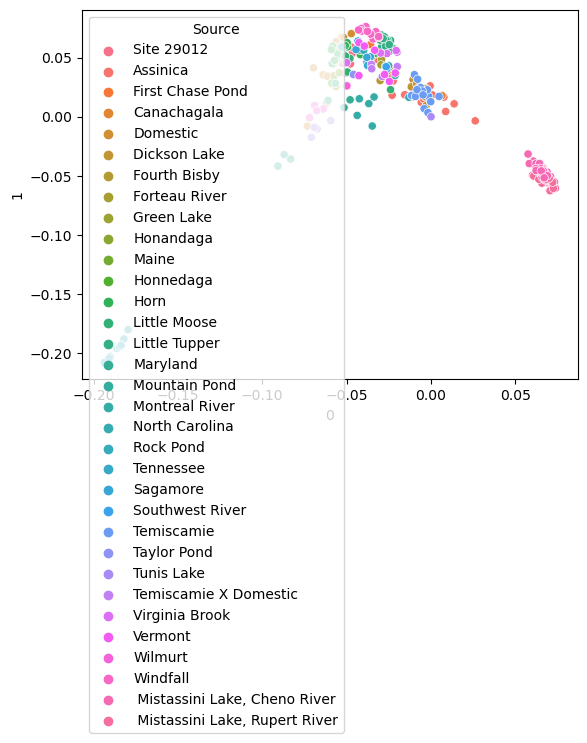

In [11]:
sns.scatterplot(data = v, x = 0, y = 1, hue = "Source")

<Axes: xlabel='0', ylabel='1'>

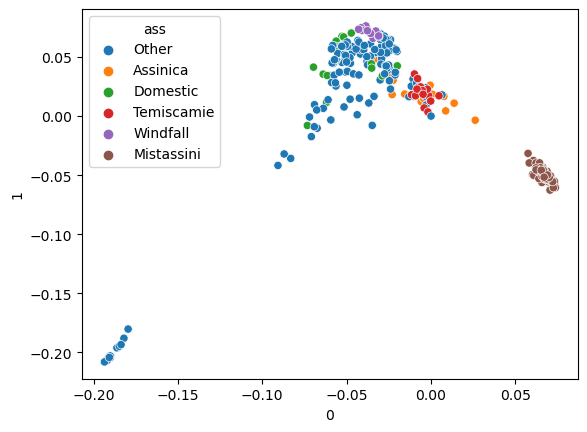

In [13]:
sns.scatterplot(data = v, x = 0, y = 1, hue = "ass")

In [37]:
!zcat ../calls/sfon.beagle.gz | awk 'NR%20==1' | gzip > ../calls/sfon_subsampled.beagle.gz

In [2]:
%%bash
source ~/.bashrc
conda activate pcangsd
cd ../calls
pcangsd -b ../calls/sfon_subsampled.beagle.gz --thread 8 --out sfon_full --minMaf 0.01

PCAngsd v.1.10.
Jonas Meisner and Anders Albrechtsen.
Using 8 thread(s).

Parsing Beagle file.
Loaded 272495 sites and 189 individuals.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 16
Number of sites after MAF filtering (0.01): 272495

Estimating covariance matrix.
Using 1 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2). RMSE=0.0037261703138438025
Individual allele frequencies estimated (3). RMSE=0.0033717078242687603
Individual allele frequencies estimated (4). RMSE=0.0028517697426159614
Individual allele frequencies estimated (5). RMSE=0.0023586067395929664
Individual allele frequencies estimated (6). RMSE=0.0019544096862304577
Individual allele frequencies estimated (7). RMSE=0.001634390992067874
Individual allele frequencies estimated (8). RMSE=0.0013812067955968697
Individual allele frequencies estimated (9). RMSE=0.001180509316750693
Individual allele frequencies estimated (10). RMS

Trying this one more time except excluding the southern samples since they are clearly quite different than the others:

In [48]:
sampleorder = pd.read_csv("../bam.list", header = None, names = ["Novogene_ID"])
sampleorder["Novogene_ID"] = sampleorder["Novogene_ID"].str.split("/", expand = True)[5].str.replace(".markdup.bam", "")
metadata = pd.read_csv("../hap_meta.csv")
indmask = sampleorder.merge(metadata, how = "left", on = "Novogene_ID")
indmask["mask"] = 1
indmask.loc[indmask["StrainState"].isin(["Tennessee", "North Carolina"]), "mask"] = 0

In [ ]:
indmask[["mask"]].to_csv("../calls/no_southern.txt", header = None, index = False)

In [6]:
sampleorder = pd.read_csv("../bam.list", header = None, names = ["Novogene_ID"])
sampleorder["Novogene_ID"] = sampleorder["Novogene_ID"].str.split("/", expand = True)[5].str.replace(".markdup.bam", "")
metadata = pd.read_csv("../wilmurt_meta.csv")
indmask = sampleorder.merge(metadata, how = "left", on = "Novogene_ID")
indmask["mask"] = 1
indmask.loc[indmask["Adirondack?"] == "N", "mask"] = 0

/tmp/ipykernel_1478020/597386181.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sampleorder["Novogene_ID"] = sampleorder["Novogene_ID"].str.split("/", expand = True)[5].str.replace(".markdup.bam", "")


In [9]:
indmask[["mask"]].to_csv("../calls/adirondack_only.txt", header = None, index = False)

In [41]:
%%bash
source ~/.bashrc
conda activate pcangsd
cd ../calls
pcangsd -b ../calls/sfon_subsampled.beagle.gz --thread 8 --out sfon_full_adirondackonly --minMaf 0.05 --filter adirondack_only.txt

PCAngsd v.1.10.
Jonas Meisner and Anders Albrechtsen.
Using 8 thread(s).

Parsing Beagle file.
Only loading 139/189 individuals.
Loaded 272495 sites and 139 individuals.
Estimating minor allele frequencies.


Traceback (most recent call last):
  File "/storage/group/ibb3/default/.conda/envs/pcangsd/bin/pcangsd", line 33, in <module>
    sys.exit(load_entry_point('PCAngsd', 'console_scripts', 'pcangsd')())
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/storage/group/ibb3/default/orbicella_popgen/pcangsd/pcangsd/pcangsd.py", line 212, in main
    f = shared.emMAF(L, args.maf_iter, args.maf_tole, args.threads)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/storage/group/ibb3/default/orbicella_popgen/pcangsd/pcangsd/shared.py", line 22, in emMAF
    shared_cy.emMAF_update(L, f, t)
KeyboardInterrupt


Process is interrupted.


In [11]:
metadata = pd.read_csv("../wilmurt_meta.csv")
indmask = sampleorder.merge(metadata, how = "left", on = "Novogene_ID")
indmask["mask"] = 1
indmask.loc[indmask["Adirondack?"] == "N", "mask"] = 0

In [12]:
metadata = pd.read_csv("../hap_meta.csv")

In [37]:
covmatrix = np.genfromtxt("../calls/sfon_full_adirondackonly.cov")
w, v = LA.eig(covmatrix)
perc_var = w / w.sum()
perc_var = pd.DataFrame(perc_var).sort_values(0, ascending = False).head(10).reset_index(drop=False)
v = pd.DataFrame(v)
x = v[list(perc_var["index"])]
X=x.values
UMAP_Object=umap.UMAP(n_neighbors=15, min_dist=0.8, n_components=2)
ComponentValues=UMAP_Object.fit_transform(X)
UMAP = pd.DataFrame(ComponentValues, columns = ["UMAP1", "UMAP2"])
sampleorder = pd.read_csv("../bam.list", header = None, names = ["Novogene_ID"])
sampleorder["Novogene_ID"] = sampleorder["Novogene_ID"].str.split("/", expand = True)[5].str.replace(".markdup.bam", "")
metadata = pd.read_csv("../wilmurt_meta.csv")
indmask = sampleorder.merge(metadata, how = "left", on = "Novogene_ID")
indmask["mask"] = 1
indmask.loc[indmask["Adirondack?"] == "N", "mask"] = 0
indmask = indmask[indmask["mask"] == 1].reset_index(drop=True)
metadata = pd.read_csv("../wilmurt_meta.csv")
metadata.columns = ["Novogene_ID", "Source", "StrainState", "Adirondack?"]
metadata.loc[metadata["Source"] == "Horn", "Source"] = "Horn Lake"
metadata.loc[metadata["Source"] == "Honandaga", "Source"] = "Honnedaga"
v = pd.concat([v, indmask], axis = 1)
v = v.merge(metadata, how = "left", on = "Novogene_ID")
v = pd.concat([v, UMAP], axis = 1)

/tmp/ipykernel_1478020/1098584794.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  sampleorder["Novogene_ID"] = sampleorder["Novogene_ID"].str.split("/", expand = True)[5].str.replace(".markdup.bam", "")


In [38]:
palette = sns.color_palette(cc.glasbey, n_colors=30)

In [39]:
v.loc[v["StrainState_y"] == "Wilmurt", "StrainState_y"] = "1Wilmurt"
v = v.sort_values("StrainState_y").reset_index(drop=True)
v.loc[v["StrainState_y"] == "1Wilmurt", "StrainState_y"] = "Wilmurt"

In [24]:
import matplotlib

/tmp/ipykernel_1478020/173050086.py:4: UserWarning: The palette list has more values (29) than needed (18), which may not be intended.
  sns.scatterplot(data = v[v["StrainState_y"] != "Wilmurt"], x = 0, y = 1, hue = "Source_y", palette = palette[1:], s = 60)
/tmp/ipykernel_1478020/173050086.py:5: UserWarning: The palette list has more values (30) than needed (1), which may not be intended.
  sns.scatterplot(data = v[v["StrainState_y"] == "Wilmurt"], x = 0, y = 1, hue = "Source_y", palette = palette, s = 60)


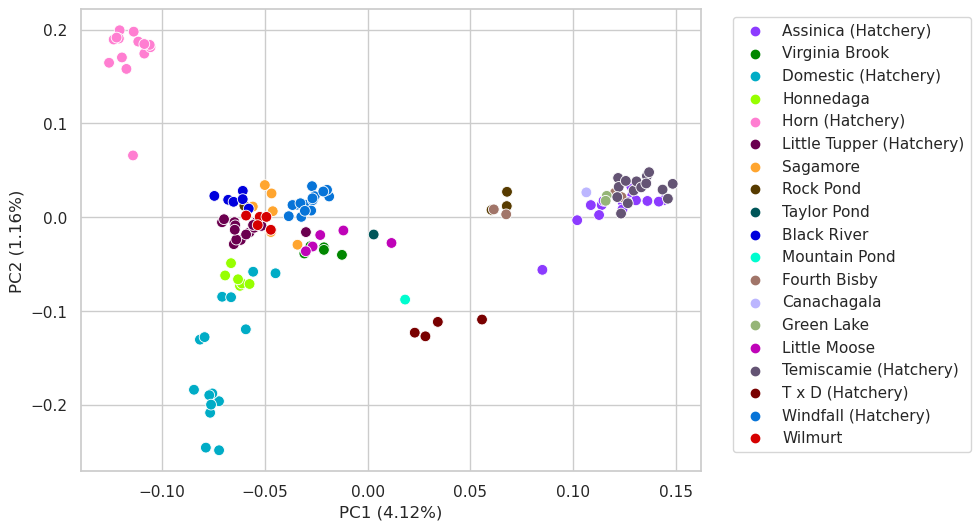

In [33]:
matplotlib.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data = v[v["StrainState_y"] != "Wilmurt"], x = 0, y = 1, hue = "Source_y", palette = palette[1:], s = 60)
sns.scatterplot(data = v[v["StrainState_y"] == "Wilmurt"], x = 0, y = 1, hue = "Source_y", palette = palette, s = 60)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("PC1 (" + str(round(perc_var[0][0]*100, 2)) + "%)")
plt.ylabel("PC2 (" + str(round(perc_var[0][1]*100, 2)) + "%)")
plt.savefig("../pca_full_dataset_adirondackonly.pdf", dpi = 300, bbox_inches='tight')

/tmp/ipykernel_1478020/2423387644.py:3: UserWarning: The palette list has more values (29) than needed (10), which may not be intended.
  sns.scatterplot(data = v[v["StrainState_y"] != "Wilmurt"], x = 0, y = 1, hue = "StrainState_y", palette = palette[1:], s = 60)
/tmp/ipykernel_1478020/2423387644.py:4: UserWarning: The palette list has more values (30) than needed (1), which may not be intended.
  sns.scatterplot(data = v[v["StrainState_y"] == "Wilmurt"], x = 0, y = 1, hue = "StrainState_y", palette = palette, s = 60)


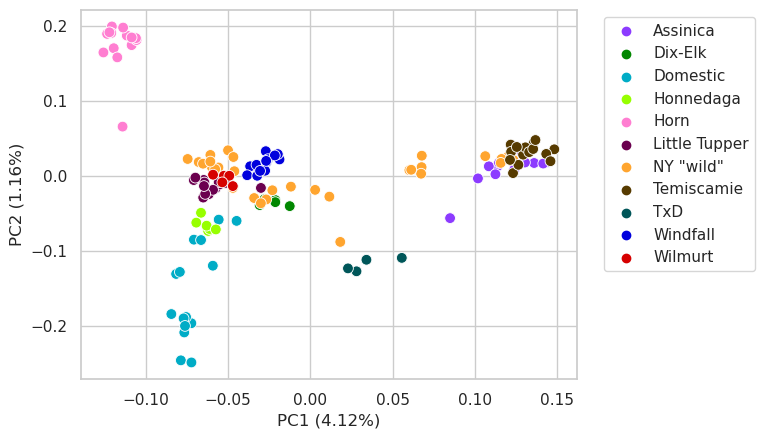

In [25]:
matplotlib.rcParams['pdf.fonttype'] = 42
sns.set_theme(style="whitegrid")
sns.scatterplot(data = v[v["StrainState_y"] != "Wilmurt"], x = 0, y = 1, hue = "StrainState_y", palette = palette[1:], s = 60)
sns.scatterplot(data = v[v["StrainState_y"] == "Wilmurt"], x = 0, y = 1, hue = "StrainState_y", palette = palette, s = 60)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("PC1 (" + str(round(perc_var[0][0]*100, 2)) + "%)")
plt.ylabel("PC2 (" + str(round(perc_var[0][1]*100, 2)) + "%)")
plt.savefig("../pca_full_dataset_adirondackonly.pdf", dpi = 300, bbox_inches='tight')

/tmp/ipykernel_1478020/3357306017.py:1: UserWarning: The palette list has more values (30) than needed (19), which may not be intended.
  sns.scatterplot(data = v, x = "UMAP1", y = "UMAP2", hue = "Source_y", palette = palette)


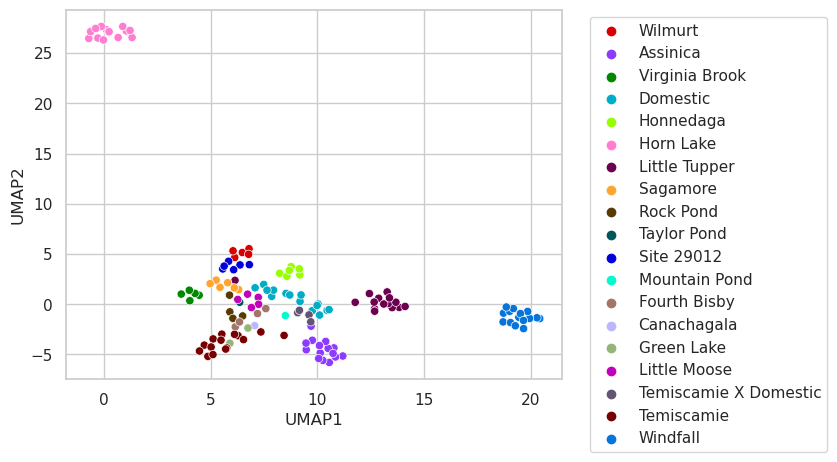

In [20]:
sns.scatterplot(data = v, x = "UMAP1", y = "UMAP2", hue = "Source_y", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [73]:
%%bash
source ~/.bashrc
conda activate pcangsd
cd ../calls
pcangsd -b ../calls/sfon_subsampled.beagle.gz --thread 8 --out sfon_full_nosouth --minMaf 0.05 --filter no_southern.txt

PCAngsd v.1.10.
Jonas Meisner and Anders Albrechtsen.
Using 8 thread(s).

Parsing Beagle file.
Only loading 177/189 individuals.
Loaded 272495 sites and 177 individuals.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 16
Number of sites after MAF filtering (0.05): 136697

Estimating covariance matrix.
Using 1 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2). RMSE=0.004089638581012538
Individual allele frequencies estimated (3). RMSE=0.0030895188761720558
Individual allele frequencies estimated (4). RMSE=0.0024369144469367915
Individual allele frequencies estimated (5). RMSE=0.0019874162038194614
Individual allele frequencies estimated (6). RMSE=0.001671554885496049
Individual allele frequencies estimated (7). RMSE=0.0014481381989120898
Individual allele frequencies estimated (8). RMSE=0.0012907436677814512
Individual allele frequencies estimated (9). RMSE=0.001179166664276752
Individual allel

In [74]:
metadata = pd.read_csv("../hap_meta.csv")
indmask = sampleorder.merge(metadata, how = "left", on = "Novogene_ID")
indmask["mask"] = 1
indmask.loc[indmask["StrainState"].isin(["Tennessee", "North Carolina"]), "mask"] = 0

In [81]:
metadata = pd.read_csv("../hap_meta.csv")

In [124]:
covmatrix = np.genfromtxt("../calls/sfon_full_nosouth.cov")
w, v = LA.eig(covmatrix)
perc_var = w / w.sum()
perc_var = pd.DataFrame(perc_var).sort_values(0, ascending = False).head(10).reset_index(drop=False)
v = pd.DataFrame(v)
x = v[list(perc_var["index"])]
X=x.values
UMAP_Object=umap.UMAP(n_neighbors=15, min_dist=0.8, n_components=2)
ComponentValues=UMAP_Object.fit_transform(X)
UMAP = pd.DataFrame(ComponentValues, columns = ["UMAP1", "UMAP2"])
sampleorder = pd.read_csv("../bam.list", header = None, names = ["Novogene_ID"])
sampleorder["Novogene_ID"] = sampleorder["Novogene_ID"].str.split("/", expand = True)[5].str.replace(".markdup.bam", "")
metadata = pd.read_csv("../hap_meta.csv")
indmask = sampleorder.merge(metadata, how = "left", on = "Novogene_ID")
indmask["mask"] = 1
indmask.loc[indmask["StrainState"].isin(["Tennessee", "North Carolina"]), "mask"] = 0
indmask = indmask[indmask["mask"] == 1].reset_index(drop=True)
metadata = pd.read_csv("../wilmurt_meta.csv")
metadata.columns = ["Novogene_ID", "Source", "StrainState"]
metadata.loc[metadata["Source"] == "Horn", "Source"] = "Horn Lake"
metadata.loc[metadata["Source"] == "Honandaga", "Source"] = "Honnedaga"
v = pd.concat([v, indmask], axis = 1)
v = v.merge(metadata, how = "left", on = "Novogene_ID")
v = pd.concat([v, UMAP], axis = 1)

/tmp/ipykernel_2051595/784104064.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  sampleorder["Novogene_ID"] = sampleorder["Novogene_ID"].str.split("/", expand = True)[5].str.replace(".markdup.bam", "")


In [125]:
palette = sns.color_palette(cc.glasbey, n_colors=18)

In [126]:
v.loc[v["StrainState_y"] == "Wilmurt", "StrainState_y"] = "1Wilmurt"
v = v.sort_values("StrainState_y").reset_index(drop=True)
v.loc[v["StrainState_y"] == "1Wilmurt", "StrainState_y"] = "Wilmurt"

In [115]:
import matplotlib

/tmp/ipykernel_2051595/1239109274.py:4: UserWarning: The palette list has more values (18) than needed (1), which may not be intended.
  sns.scatterplot(data = v[v["StrainState_y"] == "Wilmurt"], x = 0, y = 1, hue = "StrainState_y", palette = palette, s = 60)


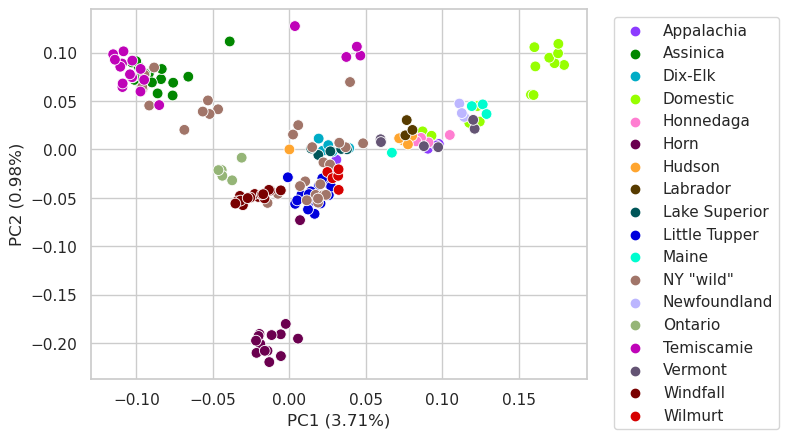

In [140]:
matplotlib.rcParams['pdf.fonttype'] = 42
sns.set_theme(style="whitegrid")
sns.scatterplot(data = v[v["StrainState_y"] != "Wilmurt"], x = 0, y = 1, hue = "StrainState_y", palette = palette[1:], s = 60)
sns.scatterplot(data = v[v["StrainState_y"] == "Wilmurt"], x = 0, y = 1, hue = "StrainState_y", palette = palette, s = 60)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("PC1 (" + str(round(perc_var[0][0]*100, 2)) + "%)")
plt.ylabel("PC2 (" + str(round(perc_var[0][1]*100, 2)) + "%)")
plt.savefig("../pca_full_dataset.pdf", dpi = 300, bbox_inches='tight')

Text(0, 0.5, 'PC2 (0.98%)')

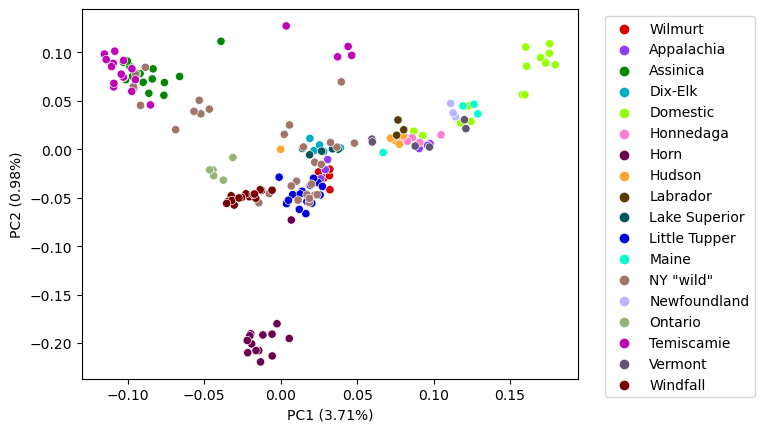

In [127]:
sns.scatterplot(data = v[v["StrainState_y"] == "Wilmurt"], x = 0, y = 1, hue = "StrainState_y", palette = palette)
sns.scatterplot(data = v[v["StrainState_y"] != "Wilmurt"], x = 0, y = 1, hue = "StrainState_y", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("PC1 (" + str(round(perc_var[0][0]*100, 2)) + "%)")
plt.ylabel("PC2 (" + str(round(perc_var[0][1]*100, 2)) + "%)")

/tmp/ipykernel_2051595/3057844135.py:1: UserWarning: The palette list has more values (30) than needed (28), which may not be intended.
  sns.scatterplot(data = v, x = 2, y = 1, hue = "Source_y", palette = palette)


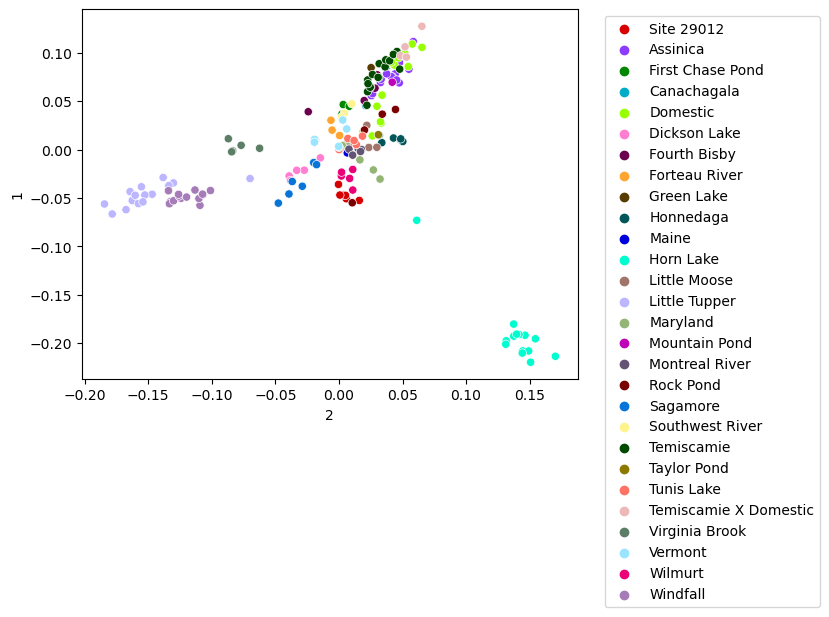

In [79]:
sns.scatterplot(data = v, x = 2, y = 1, hue = "Source_y", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

/tmp/ipykernel_2051595/3357306017.py:1: UserWarning: The palette list has more values (30) than needed (28), which may not be intended.
  sns.scatterplot(data = v, x = "UMAP1", y = "UMAP2", hue = "Source_y", palette = palette)


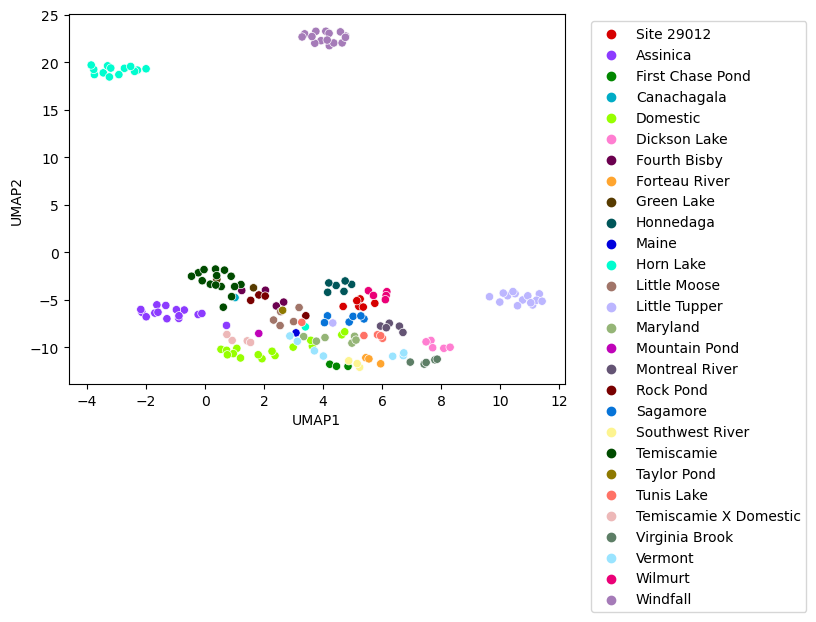

In [80]:
sns.scatterplot(data = v, x = "UMAP1", y = "UMAP2", hue = "Source_y", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [2]:
%%bash
zcat ../calls/sfon.beagle.gz \
    | /storage/group/ibb3/default/orbicella_popgen/maf_beagle_ngsadmix/maf_beagle 0.05 2> test_log.txt \
    | gzip -c > ../calls/sfon_maf05.beagle.gz 

In [3]:
%%bash
zcat ../calls/sfon_maf05.beagle.gz | tail -n+2 | cut -f 4- | gzip \
    > ../calls/sfon_maf05.ngsLD_compat.beagle.gz
zcat ../calls/sfon_maf05.beagle.gz | tail -n+2 | cut -f 1 \
    | perl -p -e 's/_([^_]+$)/\t$1/' | gzip \
    > ../calls/sfon_maf05.ngsLD_compat.pos.gz

In [4]:
!rm ~/scratch/sfon.ld ; rm ~/scratch/tmp.ld

In [40]:
task = "ngsLD"
mem = "128"
cpus = "20"
beagle = "../calls/sfon_maf05.ngsLD_compat.beagle.gz"
pos = "../calls/sfon_maf05.ngsLD_compat.pos.gz"
nind = "189"
nsites = "139030"
minmaf = "0.001" #no filter since we already filtered for MAF above
tmpldpath = "~/scratch/"
outfile = "~/scratch/sfon.ld"
subprocess.run([ "sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     beagle + " " + pos + " " + nind + " " + nsites + " " + 
                minmaf + " " + tmpldpath + " " + outfile], shell=True)

Submitted batch job 16966688


CompletedProcess(args=['sbatch --mem=128g --ntasks=20 ../ngsLD.sh ../calls/sfon_subsampled_maf05.ngsLD_compat.beagle.gz ../calls/sfon_subsampled_maf05.ngsLD_compat.pos.gz 189 139030 0.001 ~/scratch/ ~/scratch/sfon.ld'], returncode=0)

In [44]:
samps = pd.read_csv("../bam.list", header = None).reset_index(drop=False)

In [47]:
samps[0].str.split("/", expand = True)[5].str.split(".", expand = True)[0]

0      29012_19
1      29012_20
2      29012_21
3      29012_22
4      29012_23
         ...   
184      Wind_5
185      Wind_6
186      Wind_7
187      Wind_8
188      Wind_9
Name: 0, Length: 189, dtype: object

In [50]:
samps = pd.read_csv("../bam.list", header = None).reset_index(drop=False)
samps[0] = samps[0].str.split("/", expand = True)[5].str.split(".", expand = True)[0]
df = pd.read_csv('../calls/sfon_subsampled_maf05.beagle.gz', compression='gzip', sep = "\t")
subset = ["marker", "allele1", "allele2"] 
for i in samps["index"].tolist():
    subset = subset + ["Ind" + str(i), "Ind" + str(i) + ".1", "Ind" + str(i) + ".2"]
df = df[subset]
unlinked = pd.read_csv("~/scratch/sfon.ld", names = ["marker"])
unlinked["marker"] = unlinked["marker"].str.replace(":", "_")
df = unlinked.merge(df, how = "left", on = "marker")
df.columns = df.columns.str.split('.').str[0]
df.set_index("marker").to_csv("../calls/sfon_subsampled_maf05_unlinked.beagle.gz", 
                                    sep = "\t", compression = "gzip", float_format='%.6f')

In [64]:
for ks in list(range(2,16)):
    for rep in list(range(1,7)):
        task = "ngsadmix"
        mem = "64"
        cpus = "8"
        beagle = "../calls/sfon_subsampled_maf05_unlinked.beagle.gz"
        k = str(ks)
        outpath = "../ngsadmix"
        outprefix = "K" + k + "_rep" + str(rep)
        minmaf = "0.01" #We're using 0.01 as a placeholder - we already filtered above so this is essentially saying "don't filter!"
        subprocess.run([ "sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             beagle + " " + k + " " + outpath + " " + outprefix + " " + minmaf ], shell=True)

Submitted batch job 17037100
Submitted batch job 17037101
Submitted batch job 17037102
Submitted batch job 17037103
Submitted batch job 17037104
Submitted batch job 17037107
Submitted batch job 17037108
Submitted batch job 17037109
Submitted batch job 17037110
Submitted batch job 17037111
Submitted batch job 17037112
Submitted batch job 17037115
Submitted batch job 17037116
Submitted batch job 17037117
Submitted batch job 17037118
Submitted batch job 17037119
Submitted batch job 17037120
Submitted batch job 17037122
Submitted batch job 17037124
Submitted batch job 17037125
Submitted batch job 17037126
Submitted batch job 17037127
Submitted batch job 17037128
Submitted batch job 17037129
Submitted batch job 17037130
Submitted batch job 17037132
Submitted batch job 17037133
Submitted batch job 17037134
Submitted batch job 17037136
Submitted batch job 17037137
Submitted batch job 17037138
Submitted batch job 17037139
Submitted batch job 17037141
Submitted batch job 17037142
Submitted batc

In [65]:
%%bash
cd /storage/group/ibb3/default/acro_popgen_variants/trout_mitoassembly/ngsadmix/
echo -e "k\tbestlike" > trout_kvals.tsv
for k in 2 3 4 5 6 7 8 9 10 11 12 13 14 15; do
    for rep in 1 2 3 4 5 6; do
        VAR=$( cat K${k}_rep${rep}.log | grep "best like" | cut -d"=" -f2 | cut -d" " -f1 )
        echo -e "${k}\t${VAR}" >> trout_kvals.tsv
    done
done

<Axes: >

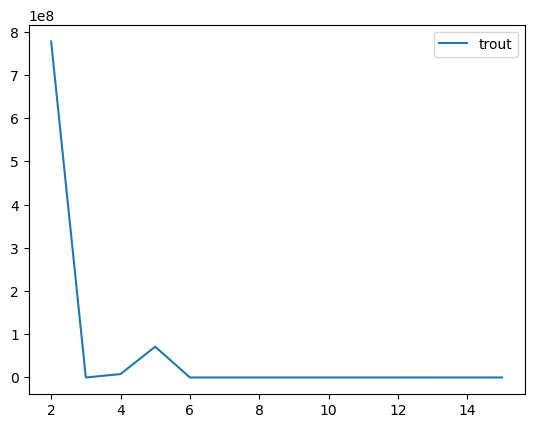

In [66]:
deltak = pd.read_csv("../ngsadmix/trout_kvals.tsv", 
            sep = "\t")
deltak["bestlike"] = deltak["bestlike"].abs()
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
deltak_val = []
for k in ks:
    deltak_val = deltak_val + [np.mean(deltak["bestlike"][deltak["k"] == k])/np.std(deltak["bestlike"][deltak["k"] == k])]
plt.figure()
sns.lineplot(x = ks, y = deltak_val, label = "trout")

In [67]:
task = "ngsremix"
mem = "128"
cpus = "2"
beagle = "../calls/sfon_subsampled_maf05_unlinked.beagle.gz"
fname = "../ngsadmix/K5_rep1.fopt.gz"
qname = "../ngsadmix/K5_rep1.qopt"
outprefix = "../ngsadmix/trout_relatedness"
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     beagle + " " + fname + " " + qname + " " + outprefix ], shell=True)

Submitted batch job 17064725


CompletedProcess(args=['sbatch --mem=128g --ntasks=2 ../ngsremix.sh ../calls/sfon_subsampled_maf05_unlinked.beagle.gz ../ngsadmix/K5_rep1.fopt.gz ../ngsadmix/K5_rep1.qopt ../ngsadmix/trout_relatedness'], returncode=0)

In [3]:
relate = pd.read_csv("../ngsadmix/trout_relatedness", sep = "\t")

In [4]:
relate[relate["k1"].notna()].sort_values("k2")

,ind1,ind2,k0,k1,k2,nIter
5630,33,144,1.000000,0.000000,0.000000,1.0
7119,43,128,0.999501,0.000499,0.000000,1.0
7118,43,127,0.996312,0.003688,0.000000,29.0
7117,43,126,0.999500,0.000500,0.000000,1.0
7116,43,125,1.000000,0.000000,0.000000,17.0
...,...,...,...,...,...,...
7651,47,86,0.744872,0.000237,0.254891,98.0
9259,59,68,0.630857,0.073025,0.296118,59.0
3367,19,156,0.625090,0.000096,0.374814,44.0
7501,46,78,0.530885,0.000088,0.469027,56.0


In [92]:
task = "ngsremix"
mem = "128"
cpus = "2"
beagle = "../calls/sfon_subsampled_maf05.beagle.gz"
fname = "../ngsadmix/K9_rep1.fopt.gz"
qname = "../ngsadmix/K9_rep1.qopt"
outprefix = "../ngsadmix/trout_relatedness"
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     beagle + " " + fname + " " + qname + " " + outprefix ], shell=True)

Submitted batch job 16932953


CompletedProcess(args=['sbatch --mem=128g --ntasks=2 ../ngsremix.sh ../calls/sfon_subsampled_maf05.beagle.gz ../ngsadmix/K9_rep1.fopt.gz ../ngsadmix/K9_rep1.qopt ../ngsadmix/trout_relatedness'], returncode=0)

In [51]:
%%bash
source ~/.bashrc
conda activate pcangsd
cd ../calls
pcangsd -b ../calls/sfon_subsampled_maf05_unlinked.beagle.gz --thread 8 --out sfon --minMaf 0.01 --admix

PCAngsd v.1.10.
Jonas Meisner and Anders Albrechtsen.
Using 8 thread(s).

Parsing Beagle file.
Loaded 89093 sites and 189 individuals.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 15
Number of sites after MAF filtering (0.01): 89093

Estimating covariance matrix.
Using 1 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2). RMSE=0.004336818828210359
Individual allele frequencies estimated (3). RMSE=0.0037801742024399796
Individual allele frequencies estimated (4). RMSE=0.0031967012295788396
Individual allele frequencies estimated (5). RMSE=0.00270051166582979
Individual allele frequencies estimated (6). RMSE=0.002294079971413414
Individual allele frequencies estimated (7). RMSE=0.001960521644292758
Individual allele frequencies estimated (8). RMSE=0.0016905877972827755
Individual allele frequencies estimated (9). RMSE=0.0014677872643889048
Individual allele frequencies estimated (10). RMSE=0.0

In [29]:
!head ../calls/sfon.admix.2.Q

0.9382111 0.0617889
0.9368335 0.0631665
0.9354490 0.0645510
0.9468228 0.0531771
0.9405642 0.0594358
0.9416743 0.0583257
0.9873669 0.0126331
0.9999000 0.0001000
0.9949124 0.0050876
0.9940672 0.0059328


In [28]:
np.load("../calls/sfon.admix.2.F.npy")

array([[2.75707126e-01, 5.44414043e-01],
       [6.45492300e-02, 4.52113599e-02],
       [5.74867837e-02, 1.07231565e-01],
       ...,
       [7.46904910e-02, 7.46942610e-02],
       [8.73602703e-02, 9.99999975e-05],
       [9.75447372e-02, 9.99999975e-05]])

In [335]:
%%bash
source ~/.bashrc
conda activate pcangsd
cd ../calls
pcangsd -b sfon.beagle.gz --thread 8 --out sfon --minMaf 0.01

PCAngsd v.1.10.
Jonas Meisner and Anders Albrechtsen.
Using 8 thread(s).

Parsing Beagle file.
Loaded 5449906 sites and 189 individuals.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 16
Number of sites after MAF filtering (0.01): 5449906

Estimating covariance matrix.
Using 1 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2). RMSE=0.0037146202249249503
Individual allele frequencies estimated (3). RMSE=0.0033640924706457138
Individual allele frequencies estimated (4). RMSE=0.0028432740574476797
Individual allele frequencies estimated (5). RMSE=0.0023492993012421055
Individual allele frequencies estimated (6). RMSE=0.0019458043564036082
Individual allele frequencies estimated (7). RMSE=0.0016258315153766043
Individual allele frequencies estimated (8). RMSE=0.001373582178284108
Individual allele frequencies estimated (9). RMSE=0.0011754372535823028
Individual allele frequencies estimated (10). 

In [52]:
from numpy import linalg as LA
import umap

In [53]:
covmatrix = np.genfromtxt("../calls/sfon.cov")
w, v = LA.eig(covmatrix)
perc_var = w / w.sum()
perc_var = pd.DataFrame(perc_var).sort_values(0, ascending = False).head(10).reset_index(drop=False)
v = pd.DataFrame(v)
x = v[list(perc_var["index"])]
X=x.values
UMAP_Object=umap.UMAP(n_neighbors=15, min_dist=0.8, n_components=2)
ComponentValues=UMAP_Object.fit_transform(X)
UMAP = pd.DataFrame(ComponentValues, columns = ["UMAP1", "UMAP2"])
sampleorder = pd.read_csv("../bam.list", header = None, names = ["Sample"])
sampleorder["Sample"] = sampleorder["Sample"].str.replace("/scratch/nsl5160/brook_trout/mapped/", 
                                                          "").str.replace(".markdup.bam", "")
metadata = pd.read_csv("../hap_meta.csv")
metadata.columns = ["Sample", "Source", "StrainState"]
metadata.loc[metadata["Source"] == "Horn", "Source"] = "Horn Lake"
metadata.loc[metadata["Source"] == "Honandaga", "Source"] = "Honnedaga"
v = pd.concat([v, sampleorder], axis = 1)
v = v.merge(metadata, how = "left", on = "Sample")
v = pd.concat([v, UMAP], axis = 1)

/tmp/ipykernel_1179410/2356811536.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  "").str.replace(".markdup.bam", "")


In [54]:
palette = sns.color_palette(cc.glasbey, n_colors=30)

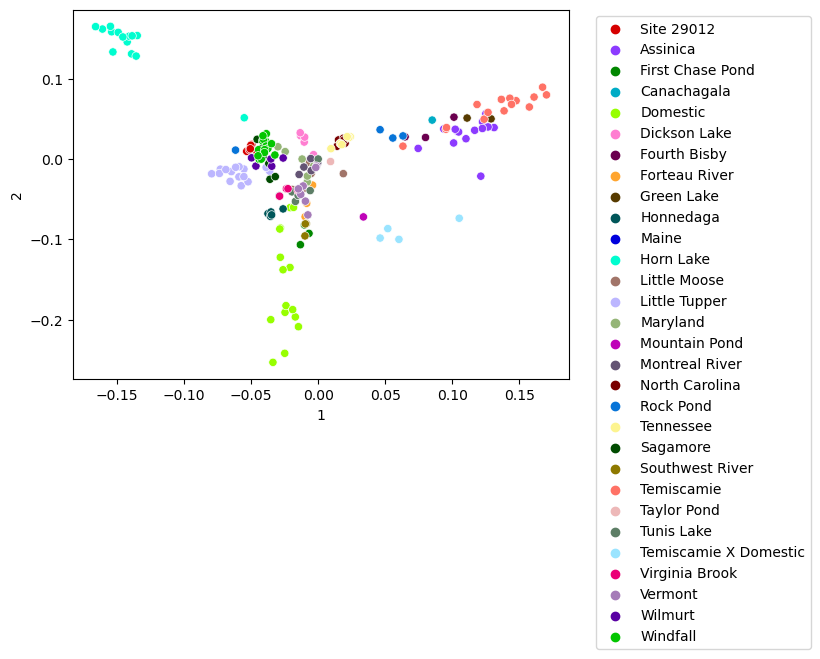

In [56]:
sns.scatterplot(data = v, x = 1, y = 2, hue = "Source", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

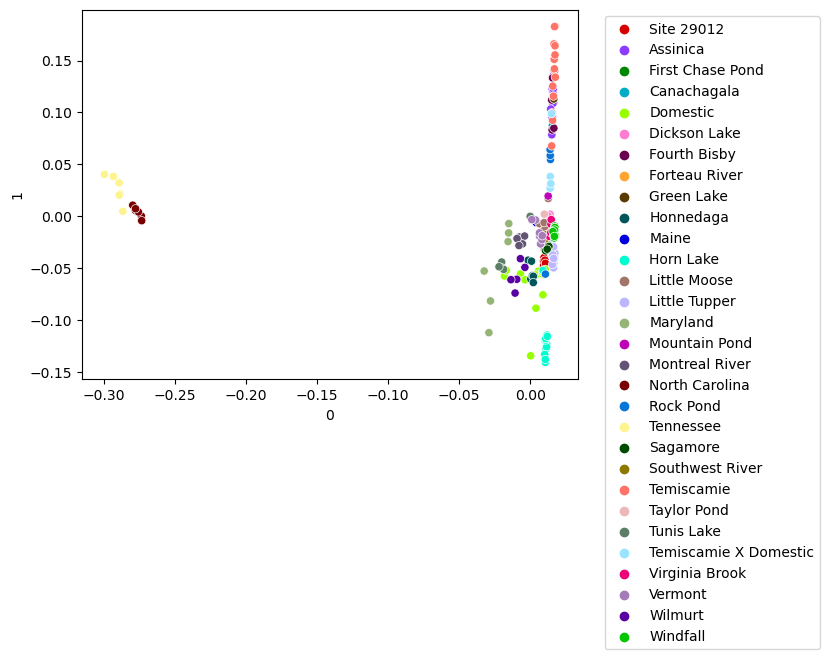

In [363]:
sns.scatterplot(data = v, x = 0, y = 1, hue = "Source", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

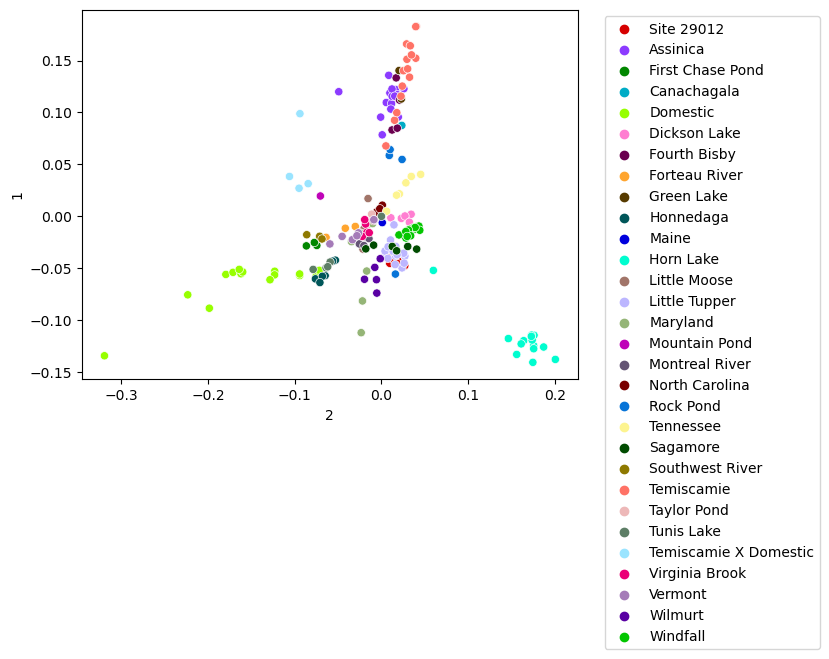

In [364]:
sns.scatterplot(data = v, x = 2, y = 1, hue = "Source", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

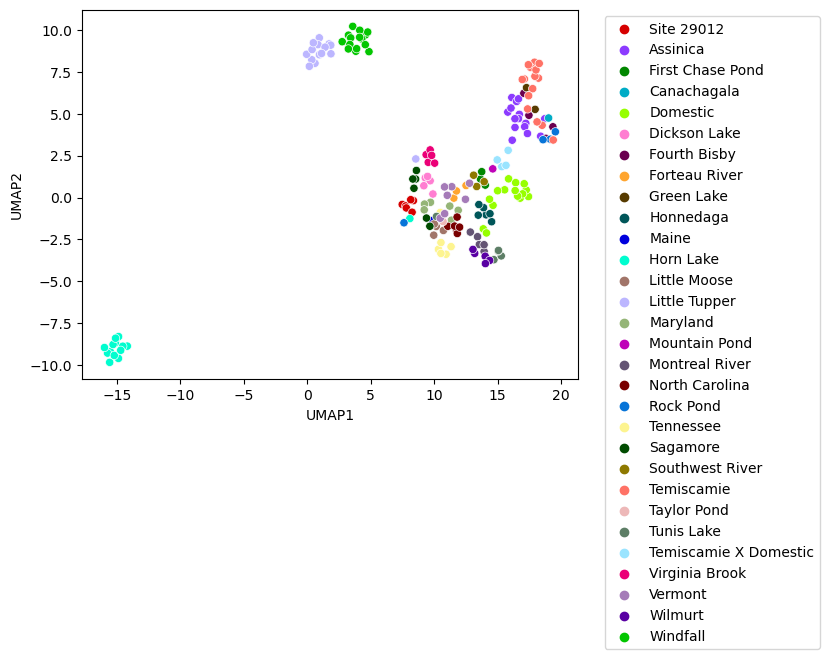

In [365]:
sns.scatterplot(data = v, x = "UMAP1", y = "UMAP2", hue = "Source", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

Trying this one more time except excluding the southern samples since they are clearly quite different than the others:

In [368]:
indmask = sampleorder.merge(metadata, how = "left", on = "Sample")

In [370]:
indmask["mask"] = 1
indmask.loc[indmask["StrainState"].isin(["Tennessee", "North Carolina"]), "mask"] = 0

In [373]:
indmask[["mask"]].to_csv("../calls/no_southern.txt", header = None, index = False)

In [57]:
%%bash
source ~/.bashrc
conda activate pcangsd
cd ../calls
pcangsd -b ../calls/sfon_subsampled_maf05_unlinked.beagle.gz --thread 8 --out sfon_nosouth --filter no_southern.txt

PCAngsd v.1.10.
Jonas Meisner and Anders Albrechtsen.
Using 8 thread(s).

Parsing Beagle file.
Only loading 177/189 individuals.
Loaded 89093 sites and 177 individuals.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 15
Number of sites after MAF filtering (0.05): 85891

Estimating covariance matrix.
Using 1 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2). RMSE=0.003971905035790091
Individual allele frequencies estimated (3). RMSE=0.003006560946291546
Individual allele frequencies estimated (4). RMSE=0.002354889646271861
Individual allele frequencies estimated (5). RMSE=0.0018867734756335846
Individual allele frequencies estimated (6). RMSE=0.0015461474817874906
Individual allele frequencies estimated (7). RMSE=0.001296069053370674
Individual allele frequencies estimated (8). RMSE=0.0011155231045198197
Individual allele frequencies estimated (9). RMSE=0.0009854660431510137
Individual allele f

In [58]:
covmatrix = np.genfromtxt("../calls/sfon_nosouth.cov")
w, v = LA.eig(covmatrix)
perc_var = w / w.sum()
perc_var = pd.DataFrame(perc_var).sort_values(0, ascending = False).head(10).reset_index(drop=False)
v = pd.DataFrame(v)
x = v[list(perc_var["index"])]
X=x.values
UMAP_Object=umap.UMAP(n_neighbors=15, min_dist=0.8, n_components=2)
ComponentValues=UMAP_Object.fit_transform(X)
UMAP = pd.DataFrame(ComponentValues, columns = ["UMAP1", "UMAP2"])
sampleorder = pd.read_csv("../bam.list", header = None, names = ["Sample"])
sampleorder["Sample"] = sampleorder["Sample"].str.replace("/scratch/nsl5160/brook_trout/mapped/", 
                                                          "").str.replace(".markdup.bam", "")
metadata = pd.read_csv("../hap_meta.csv")
metadata.columns = ["Sample", "Source", "StrainState"]
metadata.loc[metadata["Source"] == "Horn", "Source"] = "Horn Lake"
metadata.loc[metadata["Source"] == "Honandaga", "Source"] = "Honnedaga"
v = pd.concat([v, sampleorder], axis = 1)
v = v.merge(metadata, how = "left", on = "Sample")
v = pd.concat([v, UMAP], axis = 1)

/tmp/ipykernel_1179410/2847220722.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  "").str.replace(".markdup.bam", "")


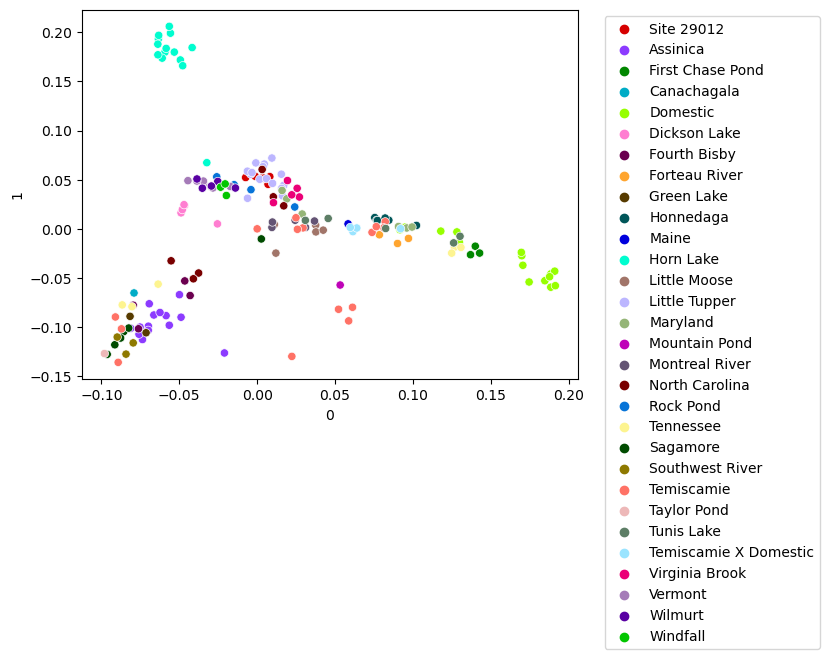

In [59]:
sns.scatterplot(data = v, x = 0, y = 1, hue = "Source", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

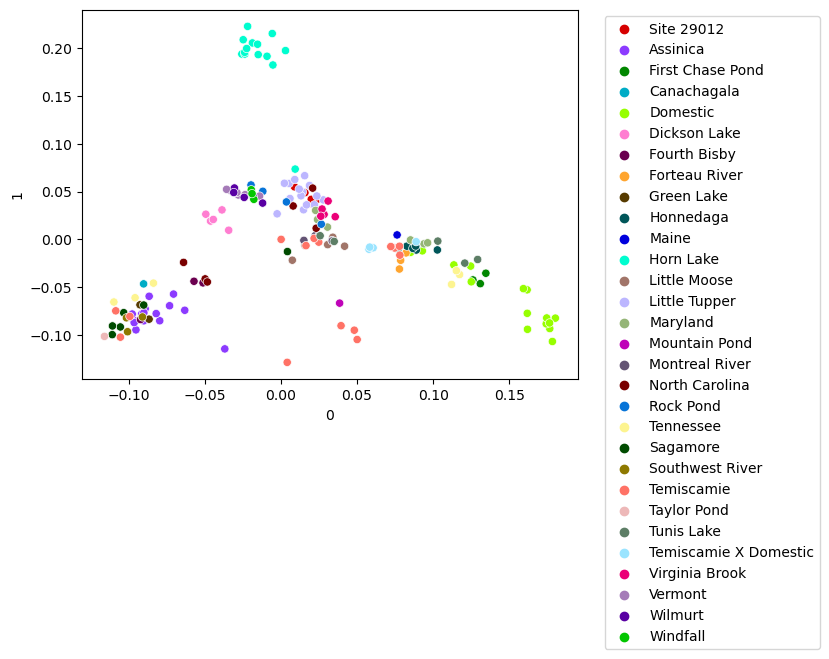

In [386]:
sns.scatterplot(data = v, x = 0, y = 1, hue = "Source", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

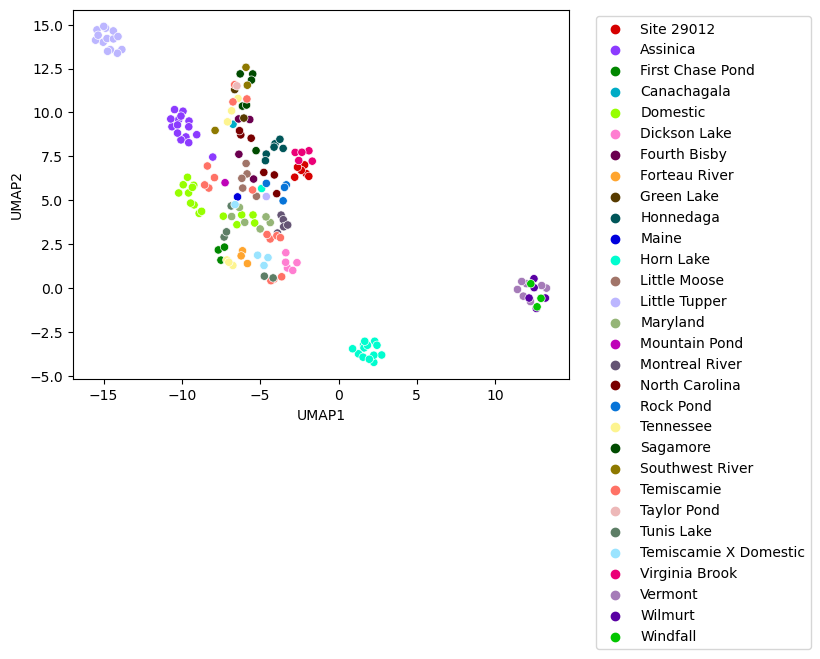

In [60]:
sns.scatterplot(data = v, x = "UMAP1", y = "UMAP2", hue = "Source", palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")